**Ryan Skeete**

In [250]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm # for regression modelling
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import warnings
warnings.filterwarnings('ignore')

In [251]:
pisa = pd.read_csv('Documents/Research Papers/DATA/PISADATA2.csv',\
    encoding='latin 1')

In [252]:
pisa.info()
pisa.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ï»¿year                              322 non-null    int64  
 1   jurisdiction                         322 non-null    object 
 2   country_code                         315 non-null    object 
 3   region                               308 non-null    object 
 4   reading_score_avg                    310 non-null    object 
 5   reading_score_female_avg             310 non-null    object 
 6   reading_score_male_avg               310 non-null    object 
 7   math_scores_avg                      305 non-null    object 
 8   math_female_score_avg                305 non-null    object 
 9   math_male_score_avg                  305 non-null    object 
 10  science_score_avg                    300 non-null    object 
 11  science_female_score_avg        

ï»¿year                          jurisdiction country_code  \
0     2018  Selected countries and jurisdictions          NaN   
1     2018          International Average (OECD)         OECD   
2     2018                             Australia          AUS   
3     2018                               Austria          AUT   
4     2018                               Belgium          BEL   

                  region reading_score_avg reading_score_female_avg  \
0                    NaN               487                      502   
1                    NaN               487                      502   
2    East Asia & Pacific               503                      519   
3  Europe & Central Asia               484                      499   
4  Europe & Central Asia               493                      504   

  reading_score_male_avg math_scores_avg math_female_score_avg  \
0                    472             489                   487   
1                    472             489                   487   
2                    487             491                   488   
3                    471             499                   492   
4                    482             508                   502   

  math_male_score_avg  ... science_female_score_avg science_male_score_avg  \
0                 492  ...                      490                    488   
1                 492  ...                      490                    488   
2                 494  ...                      502                    504   
3                 505  ...                      489                    491   
4                 514  ...                      496                    501   

  per_diff_heritage_lang highest_occup_parents_statius_index  \
0                   14.4                                52.3   
1                   14.4                                52.3   
2                   22.8                                55.8   
3                   22.6                                50.8   
4                   20.2                                52.4   

  econ_soc_cul_index gdp_per_cap_ppp  income_group gov_educ_exp_percent_gdp  \
0              -0.03             NaN           NaN                      NaN   
1              -0.03             NaN           NaN                      NaN   
2               0.32     51036.40589   High Income                      NaN   
3               0.01     56871.21140   High Income                      NaN   
4               0.07     52249.57346   High Income                      NaN   

  gov_exp_secondary_educ_per_student per_2_parents  
0                                NaN           NaN  
1                                NaN           NaN  
2                                NaN            ..  
3                                NaN          87.9  
4                                NaN          73.6  

[5 rows x 21 columns]

In [253]:
# Data Cleaning
pisa=pisa.rename(columns={'math_scores_avg':'math_score_avg',\
        'math_female_score_avg':'math_score_female_avg',\
        'math_male_score_avg':'math_score_male_avg',\
        'science_female_score_avg':'science_score_female_avg',\
        'science_male_score_avg':'science_score_male_avg'})

In [254]:
pisa=pisa.rename(columns={'ï»¿year':'year',\
        'highest_occup_parents_statius_index':'highest_occup_parents_status_index'})

In [255]:
# Converting from character (due to inclusion of unusual characters
#     for missing) to numeric data
pisa['reading_score_avg']=pd.to_numeric(pisa['reading_score_avg'],\
    errors='coerce')

In [256]:
# Converting from character (due to inclusion of unusual characters 
#    for missing) to numeric data
pisa[['reading_score_female_avg','reading_score_male_avg']]\
    = pisa[['reading_score_female_avg','reading_score_male_avg']]\
        .apply(pd.to_numeric,errors='coerce')

In [257]:
# Converting from character (due to inclusion of unusual characters 
#   for missing) to numeric data
pisa[['math_score_avg','math_score_female_avg','math_score_male_avg']]\
    = pisa[['math_score_avg','math_score_female_avg','math_score_male_avg']]\
        .apply(pd.to_numeric,errors='coerce')

In [258]:
# Converting from character (due to inclusion of unusual characters for missing) to numeric data
pisa[['science_score_avg','science_score_female_avg','science_score_male_avg']]\
    =pisa[['science_score_avg','science_score_female_avg','science_score_male_avg']]\
        .apply(pd.to_numeric,errors='coerce')

In [259]:
# Converting from character (due to inclusion of unusual characters for missing) to numeric data
pisa[['per_diff_heritage_lang','highest_occup_parents_status_index','econ_soc_cul_index','gov_educ_exp_percent_gdp','gov_exp_secondary_educ_per_student','per_2_parents']]\
=pisa[['per_diff_heritage_lang','highest_occup_parents_status_index','econ_soc_cul_index','gov_educ_exp_percent_gdp','gov_exp_secondary_educ_per_student','per_2_parents']]\
.apply(pd.to_numeric,errors='coerce')

In [260]:
pisa.dtypes

year                                    int64
jurisdiction                           object
country_code                           object
region                                 object
reading_score_avg                     float64
reading_score_female_avg              float64
reading_score_male_avg                float64
math_score_avg                        float64
math_score_female_avg                 float64
math_score_male_avg                   float64
science_score_avg                     float64
science_score_female_avg              float64
science_score_male_avg                float64
per_diff_heritage_lang                float64
highest_occup_parents_status_index    float64
econ_soc_cul_index                    float64
gdp_per_cap_ppp                       float64
income_group                           object
gov_educ_exp_percent_gdp              float64
gov_exp_secondary_educ_per_student    float64
per_2_parents                         float64
dtype: object

In [261]:
pisa.head(3)

year                          jurisdiction country_code  \
0  2018  Selected countries and jurisdictions          NaN   
1  2018          International Average (OECD)         OECD   
2  2018                             Australia          AUS   

                region  reading_score_avg  reading_score_female_avg  \
0                  NaN              487.0                     502.0   
1                  NaN              487.0                     502.0   
2  East Asia & Pacific              503.0                     519.0   

   reading_score_male_avg  math_score_avg  math_score_female_avg  \
0                   472.0           489.0                  487.0   
1                   472.0           489.0                  487.0   
2                   487.0           491.0                  488.0   

   math_score_male_avg  ...  science_score_female_avg  science_score_male_avg  \
0                492.0  ...                     490.0                   488.0   
1                492.0  ...                     490.0                   488.0   
2                494.0  ...                     502.0                   504.0   

   per_diff_heritage_lang  highest_occup_parents_status_index  \
0                    14.4                                52.3   
1                    14.4                                52.3   
2                    22.8                                55.8   

   econ_soc_cul_index  gdp_per_cap_ppp  income_group gov_educ_exp_percent_gdp  \
0               -0.03              NaN           NaN                      NaN   
1               -0.03              NaN           NaN                      NaN   
2                0.32      51036.40589   High Income                      NaN   

   gov_exp_secondary_educ_per_student  per_2_parents  
0                                 NaN            NaN  
1                                 NaN            NaN  
2                                 NaN            NaN  

[3 rows x 21 columns]

In [262]:
# we are not intersted in the OECD row
pisa.drop(pisa[pisa['country_code']=='OECD'].index,inplace=True)

In [263]:
# This row is not important for our analysis
pisa.drop(pisa[pisa['jurisdiction']=='Selected countries and jurisdictions'].index,inplace=True)

In [264]:
pisa.head(10)

year     jurisdiction country_code                     region  \
2   2018        Australia          AUS        East Asia & Pacific   
3   2018          Austria          AUT      Europe & Central Asia   
4   2018          Belgium          BEL      Europe & Central Asia   
5   2018           Brazil          BRA  Latin America & Caribbean   
6   2018  B-S-J-G (China)         CHN1        East Asia & Pacific   
7   2018  B-S-J-Z (China)         CHN2        East Asia & Pacific   
8   2018           Canada          CAN              North America   
9   2018            Chile          CHL  Latin America & Caribbean   
10  2018         Colombia          COL  Latin America & Caribbean   
11  2018   Czech Republic          CZE      Europe & Central Asia   

    reading_score_avg  reading_score_female_avg  reading_score_male_avg  \
2               503.0                     519.0                   487.0   
3               484.0                     499.0                   471.0   
4               493.0                     504.0                   482.0   
5               413.0                     426.0                   400.0   
6                 NaN                       NaN                     NaN   
7               555.0                     562.0                   549.0   
8               520.0                     535.0                   506.0   
9               452.0                     462.0                   442.0   
10              412.0                     417.0                   407.0   
11              490.0                     507.0                   474.0   

    math_score_avg  math_score_female_avg  math_score_male_avg  ...  \
2            491.0                  488.0                494.0  ...   
3            499.0                  492.0                505.0  ...   
4            508.0                  502.0                514.0  ...   
5            384.0                  379.0                388.0  ...   
6              NaN                    NaN                  NaN  ...   
7            591.0                  586.0                597.0  ...   
8            512.0                  510.0                514.0  ...   
9            417.0                  414.0                421.0  ...   
10           391.0                  381.0                401.0  ...   
11           499.0                  498.0                501.0  ...   

    science_score_female_avg  science_score_male_avg  per_diff_heritage_lang  \
2                      502.0                   504.0                    22.8   
3                      489.0                   491.0                    22.6   
4                      496.0                   501.0                    20.2   
5                      404.0                   403.0                     NaN   
6                        NaN                     NaN                     NaN   
7                      584.0                   596.0                     0.3   
8                      520.0                   516.0                    28.5   
9                      442.0                   445.0                     6.0   
10                     407.0                   420.0                     4.0   
11                     498.0                   496.0                     3.9   

    highest_occup_parents_status_index  econ_soc_cul_index  gdp_per_cap_ppp  \
2                                 55.8                0.32      51036.40589   
3                                 50.8                0.01      56871.21140   
4                                 52.4                0.07      52249.57346   
5                                 42.2               -1.10      14940.67261   
6                                  NaN                 NaN              NaN   
7                                 48.7               -0.67      15602.94147   
8                                 57.5                0.42      50077.79624   
9                                 43.9               -0.58      24765.23459   
10                                41.6      

In [265]:


# create variable which describes a unique color for each region
pisa.loc[pisa.region.str.contains('East'),'colors']='blue'
pisa.loc[pisa.region.str.contains('Europe'),'colors']='yellow'
pisa.loc[pisa.region.str.contains('Latin'),'colors']='red'
pisa.loc[pisa.region.str.contains('North'),'colors']='green'
pisa.loc[pisa.region.str.contains('Middle'),'colors']='orange'


def bubble_plots(x,y,title,xlabel,ylabel, first_loc='upper right',sec_loc='lower right', s=None,c=pisa.colors):
    '''Plots a bubble chart using seaborn style.
    x and y parameters are the horizontal and vertical
    coordinates of the data points. 
    s is an optional parameter and contains the size of the marker
    c is an optional parameter and contains the default sequence of colors, pisa.colors
    title is a string parameter containing the title of the chart
    xlabel and ylabel are string parameters containing the x and y labels
    of the chart
    first_loc and sec_loc are optional paramters and contains the default location of the legends
    upper right and lower right respectively'''
    
    sns.set()
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 6)
    rs_scatter = ax.scatter(x, y, s, c, cmap='spectral', edgecolor='k', alpha=.4)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    color = ['blue','yellow','red','green','orange']
    name = ['East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'North America','Middle East & North Africa']
    
    # plot legend for color_coded regions
    from matplotlib.legend import Legend
    
    for i in range(5):
        plt.scatter([], [], c=color[i], alpha=0.4, s=15,\
                    label=name[i])
    first_legend=plt.legend(scatterpoints=1, frameon=False, labelspacing=0.03,\
               loc=first_loc, title= 'Regions')
    
    # Add first legend manually so it is not override by second legend call
    ax = plt.gca().add_artist(first_legend)
    
    # plot legend for bubble sizes according to GDP per Capita
    line=[]
    for s in [200, 400, 800]:
        line.append(plt.scatter([], [], c='k', alpha=0.1, s=s,\
                    label='US$' + str(s)))
    plt.legend(handles=line, scatterpoints=1, frameon=False, labelspacing=1.5,\
               title='GDP per Capita (hundreds)', loc=sec_loc)
    

    
    plt.show()

**ENGLISH SCORES GRAPHICAL ANALYSIS BELOW**

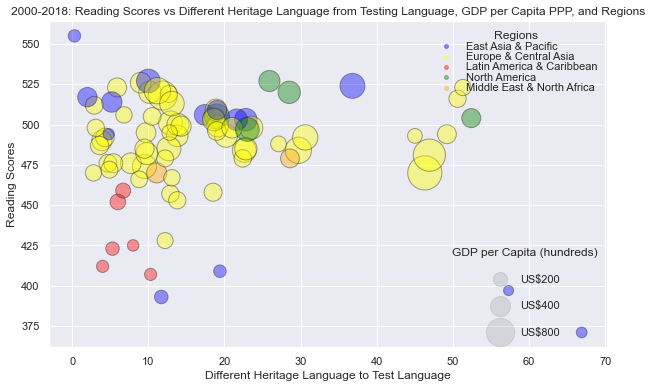

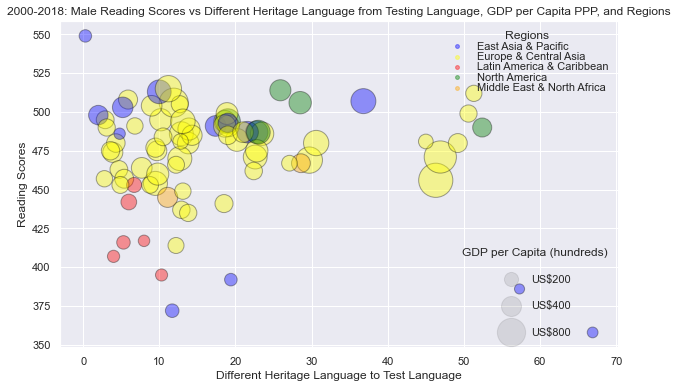

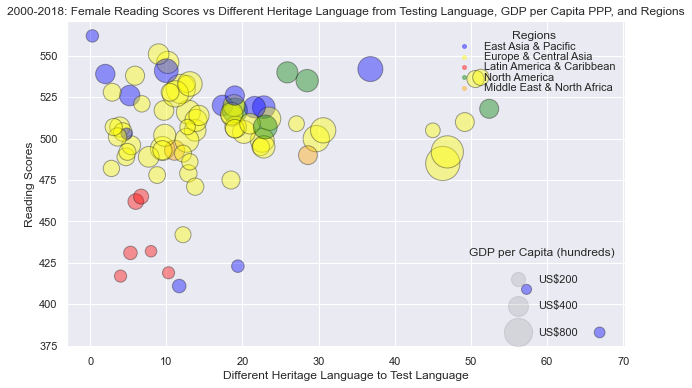

In [266]:
# Bubble plot of average reading score vs Heritage Language, region and GDP per Capita
bubble_plots(x=pisa.per_diff_heritage_lang,y=pisa.reading_score_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Reading Scores vs Different Heritage Language from Testing Language, GDP per Capita PPP, and Regions',\
             xlabel='Different Heritage Language to Test Language',ylabel='Reading Scores')

# Bubble plot of male average reading score vs Heritage Language, region and GDP per Capita
bubble_plots(x=pisa.per_diff_heritage_lang,y=pisa.reading_score_male_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Male Reading Scores vs Different Heritage Language from Testing Language, GDP per Capita PPP, and Regions',\
             xlabel='Different Heritage Language to Test Language',ylabel='Reading Scores')

# Bubble plot of female average reading score vs Heritage Language, region and GDP per Capita
bubble_plots(x=pisa.per_diff_heritage_lang,y=pisa.reading_score_female_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Female Reading Scores vs Different Heritage Language from Testing Language, GDP per Capita PPP, and Regions',\
             xlabel='Different Heritage Language to Test Language',ylabel='Reading Scores')


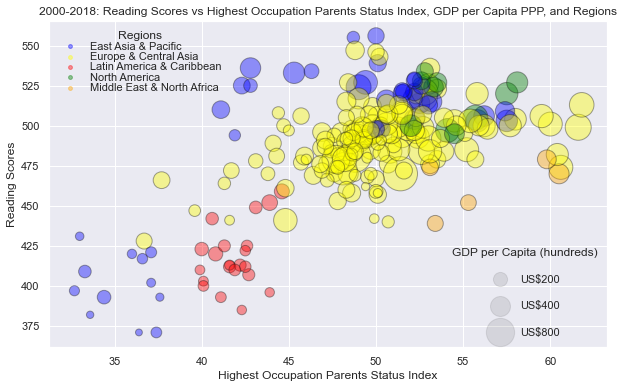

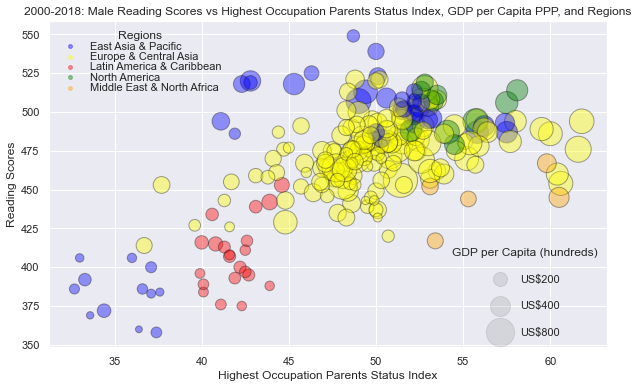

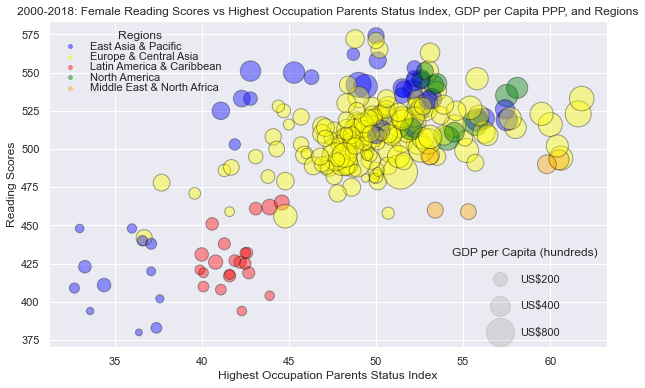

In [267]:
# Bubble plot of average reading score vs Highest Occupation Parents Status Index, region and GDP per Capita
bubble_plots(x=pisa.highest_occup_parents_status_index,y=pisa.reading_score_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Reading Scores vs Highest Occupation Parents Status Index, GDP per Capita PPP, and Regions',\
             xlabel='Highest Occupation Parents Status Index',\
             ylabel='Reading Scores',first_loc='upper left')

# Bubble plot of average male reading score vs Highest Occupation Parents Status Index, region and GDP per Capita
bubble_plots(x=pisa.highest_occup_parents_status_index,y=pisa.reading_score_male_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Male Reading Scores vs Highest Occupation Parents Status Index, GDP per Capita PPP, and Regions',\
             xlabel='Highest Occupation Parents Status Index',\
             ylabel='Reading Scores',first_loc='upper left')

# Bubble plot of average female reading score vs Highest Occupation Parents Status Index, region and GDP per Capita
bubble_plots(x=pisa.highest_occup_parents_status_index,y=pisa.reading_score_female_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Female Reading Scores vs Highest Occupation Parents Status Index, GDP per Capita PPP, and Regions',\
             xlabel='Highest Occupation Parents Status Index',\
             ylabel='Reading Scores',first_loc='upper left')


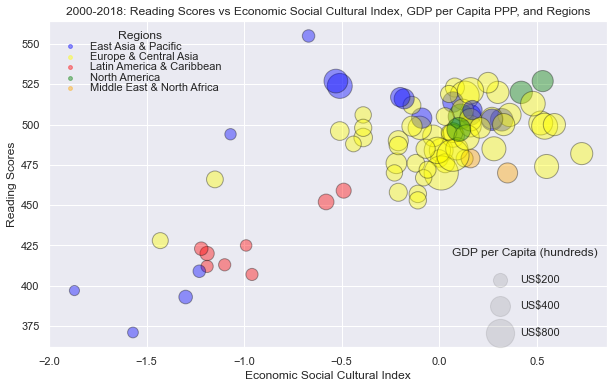

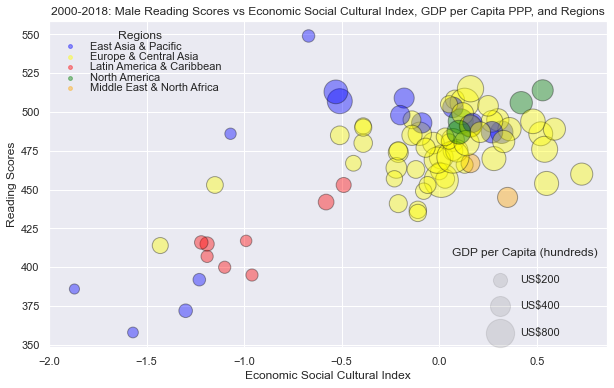

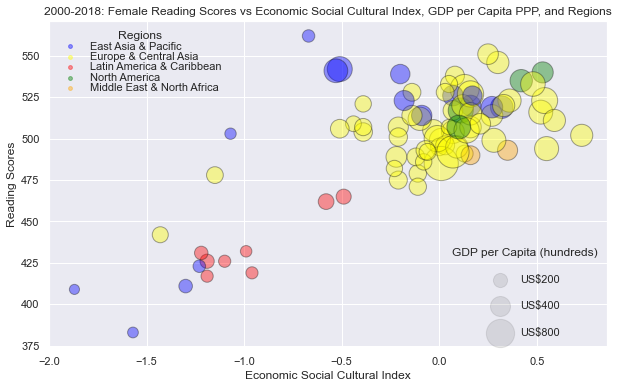

In [268]:
# Bubble plot of average reading score vs Economic Social Cultural Index, region and GDP per Capita
bubble_plots(x=pisa.econ_soc_cul_index,y=pisa.reading_score_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Reading Scores vs Economic Social Cultural Index, GDP per Capita PPP, and Regions',\
             xlabel='Economic Social Cultural Index',\
             ylabel='Reading Scores',first_loc='upper left')

# Bubble plot of male average reading score vs Economic Social Cultural Index, region and GDP per Capita
bubble_plots(x=pisa.econ_soc_cul_index,y=pisa.reading_score_male_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Male Reading Scores vs Economic Social Cultural Index, GDP per Capita PPP, and Regions',\
             xlabel='Economic Social Cultural Index',\
             ylabel='Reading Scores',first_loc='upper left')

# Bubble plot of average female reading score vs Economic Social Cultural Index, region and GDP per Capita
bubble_plots(x=pisa.econ_soc_cul_index,y=pisa.reading_score_female_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Female Reading Scores vs Economic Social Cultural Index, GDP per Capita PPP, and Regions',\
             xlabel='Economic Social Cultural Index',\
             ylabel='Reading Scores',first_loc='upper left')

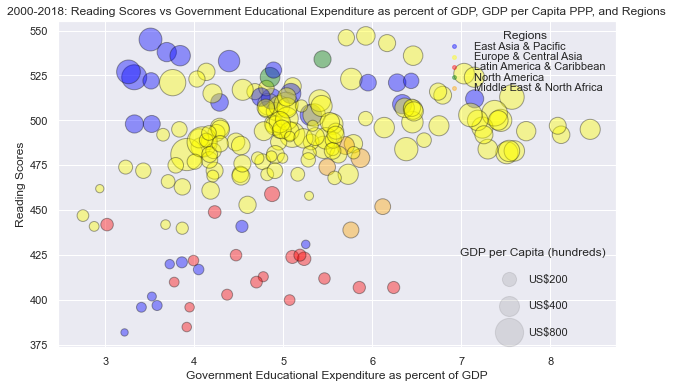

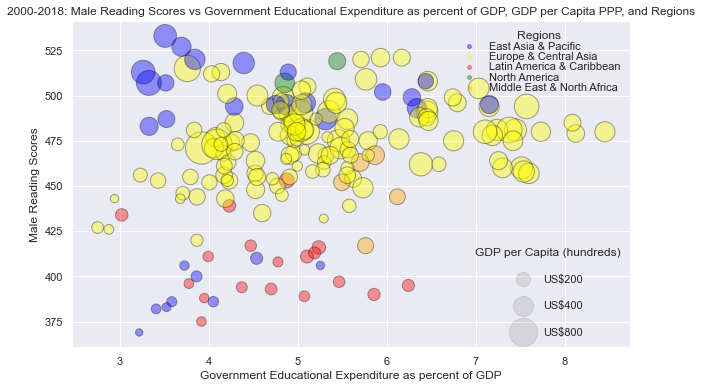

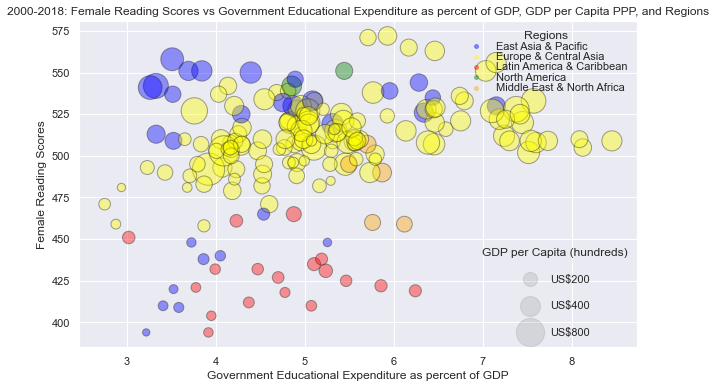

In [269]:
# Bubble plot of average reading score vs Government Educational Expenditure as percent of GDP, region and GDP per Capita
bubble_plots(x=pisa.gov_educ_exp_percent_gdp,y=pisa.reading_score_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Reading Scores vs Government Educational Expenditure as percent of GDP, GDP per Capita PPP, and Regions',\
             xlabel='Government Educational Expenditure as percent of GDP',\
             ylabel='Reading Scores')

# Bubble plot of average male reading score vs Government Educational Expenditure as percent of GDP, region and GDP per Capita
bubble_plots(x=pisa.gov_educ_exp_percent_gdp,y=pisa.reading_score_male_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Male Reading Scores vs Government Educational Expenditure as percent of GDP, GDP per Capita PPP, and Regions',\
             xlabel='Government Educational Expenditure as percent of GDP',\
             ylabel='Male Reading Scores')

# Bubble plot of average female reading score vs Government Educational Expenditure as percent of GDP, region and GDP per Capita
bubble_plots(x=pisa.gov_educ_exp_percent_gdp,y=pisa.reading_score_female_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Female Reading Scores vs Government Educational Expenditure as percent of GDP, GDP per Capita PPP, and Regions',\
             xlabel='Government Educational Expenditure as percent of GDP',\
             ylabel='Female Reading Scores')



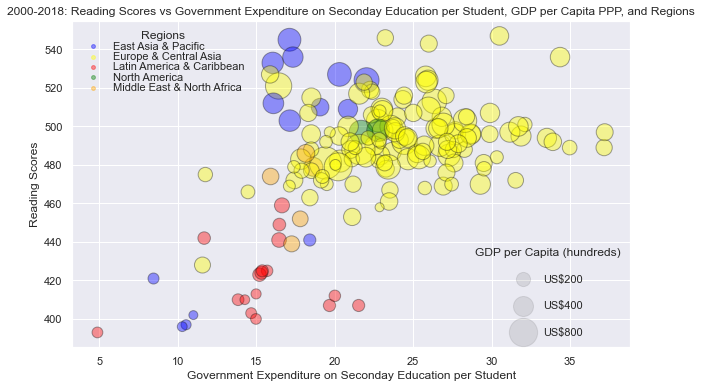

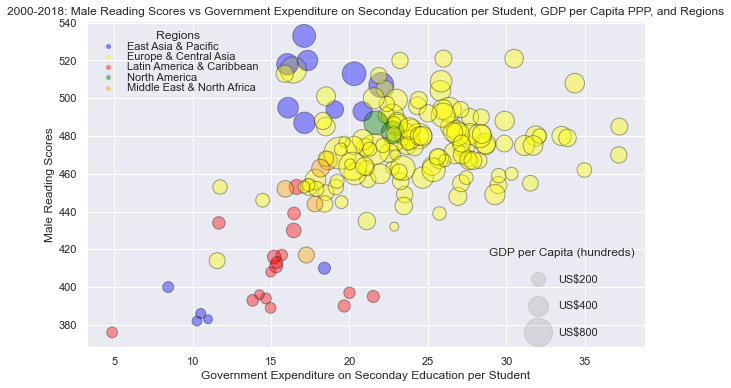

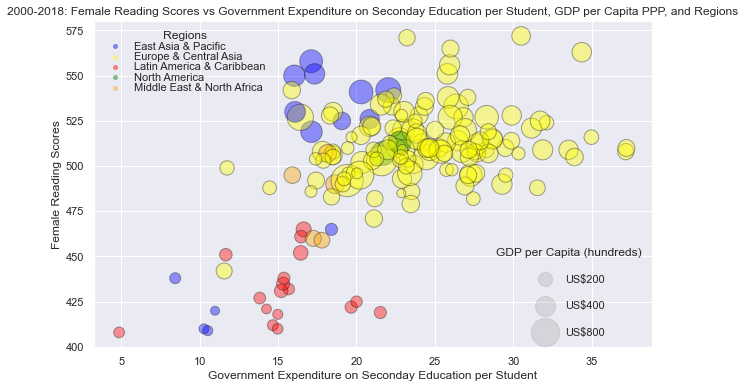

In [270]:
# Bubble plot of average reading score vs Government Expenditure on Seconday Education per Student, region and GDP per Capita
bubble_plots(x=pisa.gov_exp_secondary_educ_per_student,y=pisa.reading_score_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Reading Scores vs Government Expenditure on Seconday Education per Student, GDP per Capita PPP, and Regions',\
             xlabel='Government Expenditure on Seconday Education per Student',\
             ylabel='Reading Scores', first_loc= 'upper left')

# Bubble plot of average male reading score vs Government Expenditure on Seconday Education per Student, region and GDP per Capita
bubble_plots(x=pisa.gov_exp_secondary_educ_per_student,y=pisa.reading_score_male_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Male Reading Scores vs Government Expenditure on Seconday Education per Student, GDP per Capita PPP, and Regions',\
             xlabel='Government Expenditure on Seconday Education per Student',\
             ylabel='Male Reading Scores', first_loc= 'upper left')

# Bubble plot of female average reading score vs Government Expenditure on Seconday Education per Student, region and GDP per Capita
bubble_plots(x=pisa.gov_exp_secondary_educ_per_student,y=pisa.reading_score_female_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Female Reading Scores vs Government Expenditure on Seconday Education per Student, GDP per Capita PPP, and Regions',\
             xlabel='Government Expenditure on Seconday Education per Student',\
             ylabel='Female Reading Scores', first_loc= 'upper left')


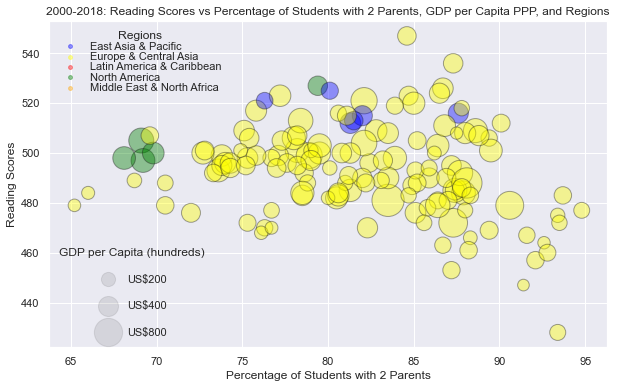

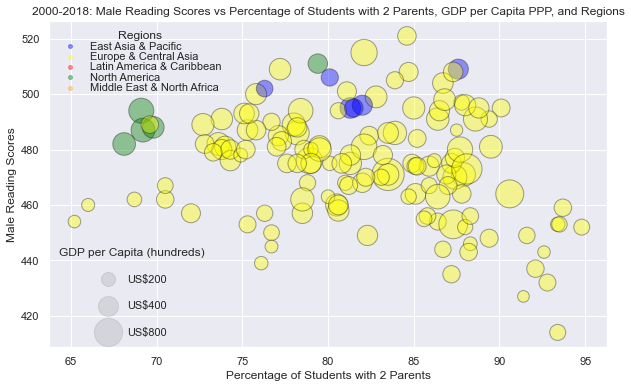

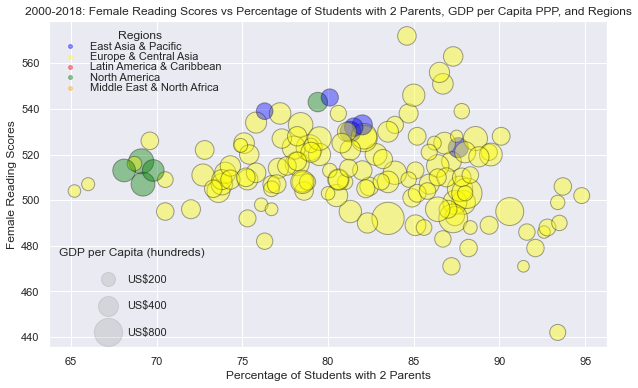

In [271]:
# Bubble plot of average reading score vs Percentage of Students with 2 Parents, region and GDP per Capita
bubble_plots(x=pisa.per_2_parents,y=pisa.reading_score_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Reading Scores vs Percentage of Students with 2 Parents, GDP per Capita PPP, and Regions',\
             xlabel='Percentage of Students with 2 Parents',\
             ylabel='Reading Scores', sec_loc= 'lower left', first_loc='upper left')

# Bubble plot of average male reading score vs Percentage of Students with 2 Parents, region and GDP per Capita
bubble_plots(x=pisa.per_2_parents,y=pisa.reading_score_male_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Male Reading Scores vs Percentage of Students with 2 Parents, GDP per Capita PPP, and Regions',\
             xlabel='Percentage of Students with 2 Parents',\
             ylabel='Male Reading Scores', sec_loc= 'lower left', first_loc='upper left')

# Bubble plot of average female reading score vs Percentage of Students with 2 Parents, region and GDP per Capita
bubble_plots(x=pisa.per_2_parents,y=pisa.reading_score_female_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Female Reading Scores vs Percentage of Students with 2 Parents, GDP per Capita PPP, and Regions',\
             xlabel='Percentage of Students with 2 Parents',\
             ylabel='Female Reading Scores', sec_loc= 'lower left', first_loc='upper left')


 **MATH SCORES GRAPHICAL ANALYSIS BELOW**

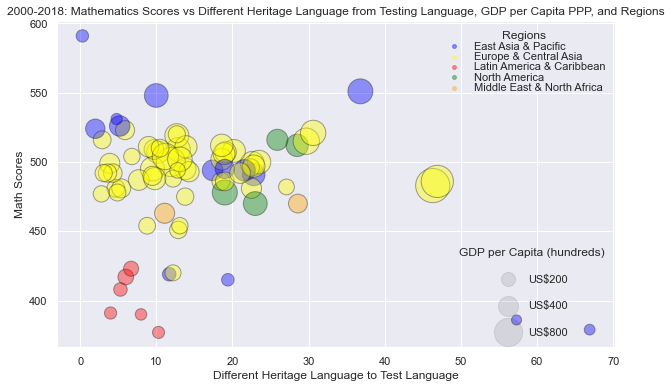

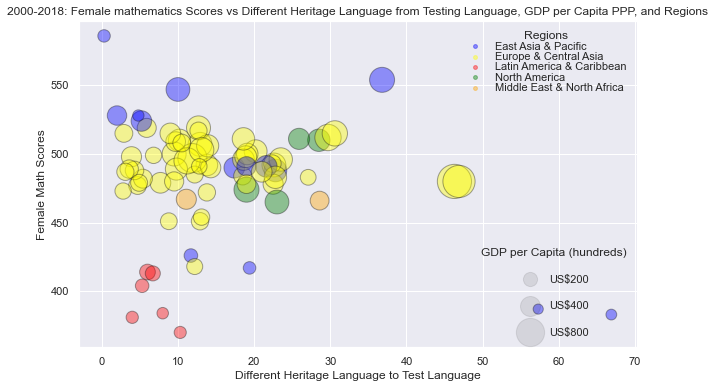

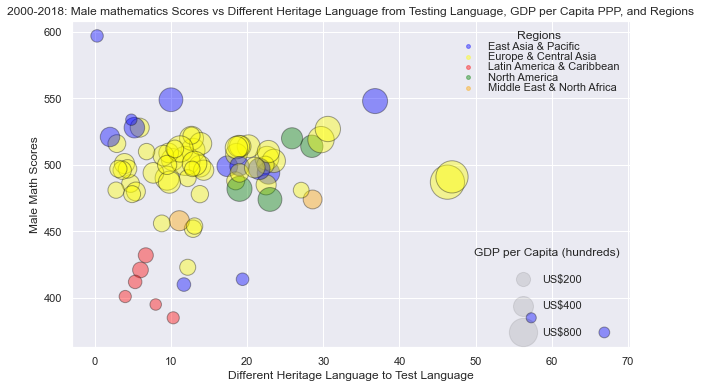

In [272]:
# Bubble plot of average math score vs Heritage Language, region and GDP per Capita
bubble_plots(x=pisa.per_diff_heritage_lang,y=pisa.math_score_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Mathematics Scores vs Different Heritage Language from Testing Language, GDP per Capita PPP, and Regions',\
             xlabel='Different Heritage Language to Test Language',ylabel='Math Scores')

# Bubble plot of average female math score vs Heritage Language, region and GDP per Capita
bubble_plots(x=pisa.per_diff_heritage_lang,y=pisa.math_score_female_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Female mathematics Scores vs Different Heritage Language from Testing Language, GDP per Capita PPP, and Regions',\
             xlabel='Different Heritage Language to Test Language',ylabel='Female Math Scores')

# Bubble plot of average male math score vs Heritage Language, region and GDP per Capita
bubble_plots(x=pisa.per_diff_heritage_lang,y=pisa.math_score_male_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Male mathematics Scores vs Different Heritage Language from Testing Language, GDP per Capita PPP, and Regions',\
             xlabel='Different Heritage Language to Test Language',ylabel='Male Math Scores')

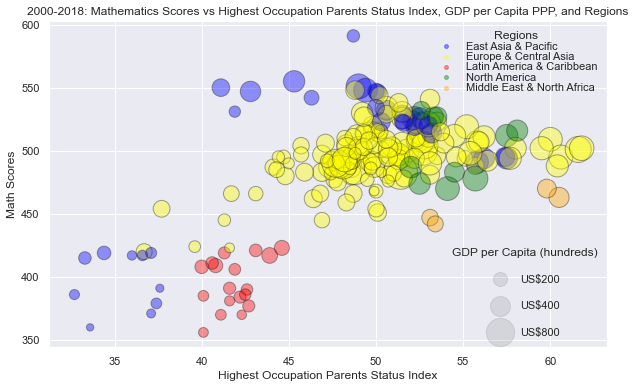

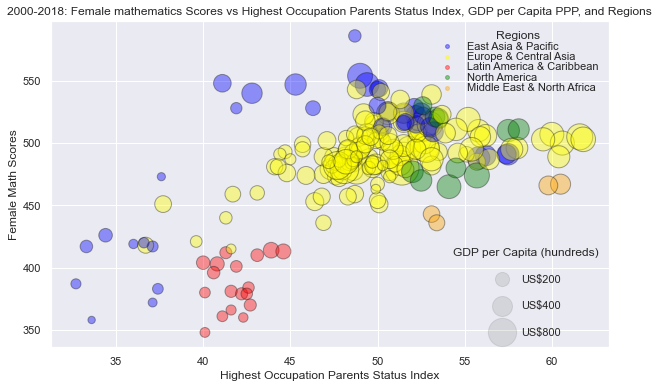

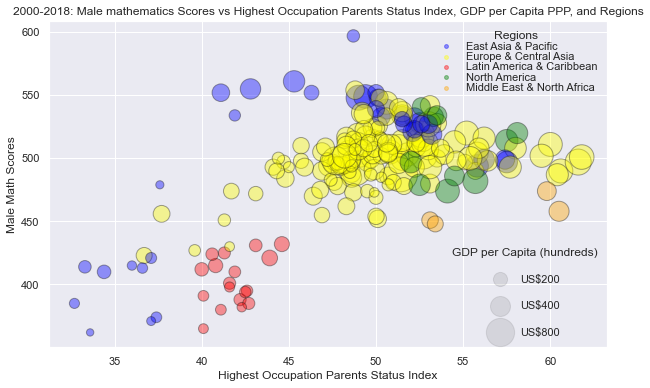

In [273]:
# Bubble plot of average math score vs Highest Occupation Parents Status Index, region and GDP per Capita
bubble_plots(x=pisa.highest_occup_parents_status_index,y=pisa.math_score_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Mathematics Scores vs Highest Occupation Parents Status Index, GDP per Capita PPP, and Regions',\
             xlabel='Highest Occupation Parents Status Index',ylabel='Math Scores')

# Bubble plot of average female math score vs Highest Occupation Parents Status Index, region and GDP per Capita
bubble_plots(x=pisa.highest_occup_parents_status_index,y=pisa.math_score_female_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Female mathematics Scores vs Highest Occupation Parents Status Index, GDP per Capita PPP, and Regions',\
             xlabel='Highest Occupation Parents Status Index',ylabel='Female Math Scores')

# Bubble plot of average male math score vs Highest Occupation Parents Status Index, region and GDP per Capita
bubble_plots(x=pisa.highest_occup_parents_status_index,y=pisa.math_score_male_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Male mathematics Scores vs Highest Occupation Parents Status Index, GDP per Capita PPP, and Regions',\
             xlabel='Highest Occupation Parents Status Index',ylabel='Male Math Scores')

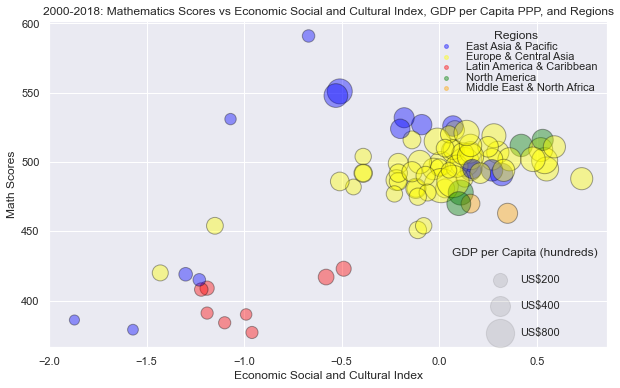

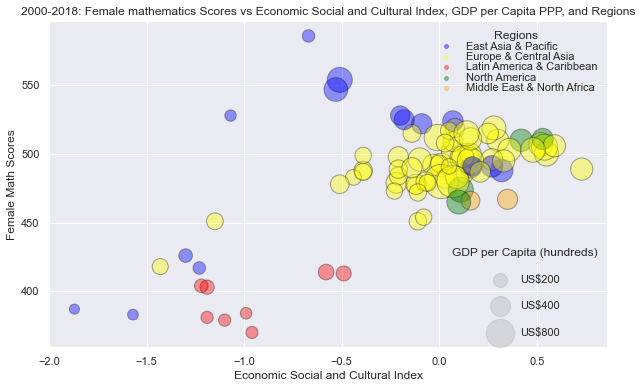

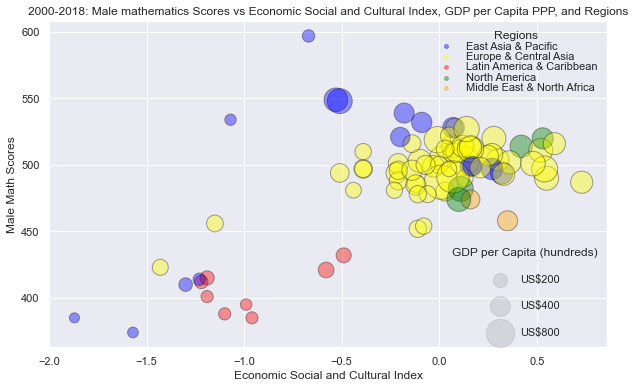

In [274]:
# Bubble plot of average math score vs Economic Social and Cultural Index, region and GDP per Capita
bubble_plots(x=pisa.econ_soc_cul_index,y=pisa.math_score_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Mathematics Scores vs Economic Social and Cultural Index, GDP per Capita PPP, and Regions',\
             xlabel='Economic Social and Cultural Index',ylabel='Math Scores')

# Bubble plot of average female math score vs Economic Social and Cultural Index, region and GDP per Capita
bubble_plots(x=pisa.econ_soc_cul_index,y=pisa.math_score_female_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Female mathematics Scores vs Economic Social and Cultural Index, GDP per Capita PPP, and Regions',\
             xlabel='Economic Social and Cultural Index',ylabel='Female Math Scores')

# Bubble plot of average male math score vs Economic Social and Cultural Index, region and GDP per Capita
bubble_plots(x=pisa.econ_soc_cul_index,y=pisa.math_score_male_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Male mathematics Scores vs Economic Social and Cultural Index, GDP per Capita PPP, and Regions',\
             xlabel='Economic Social and Cultural Index',ylabel='Male Math Scores')

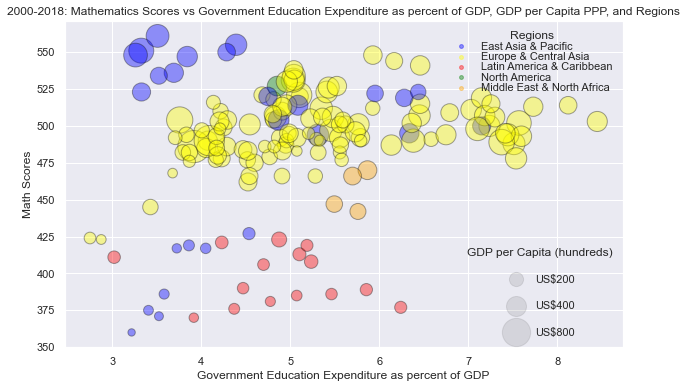

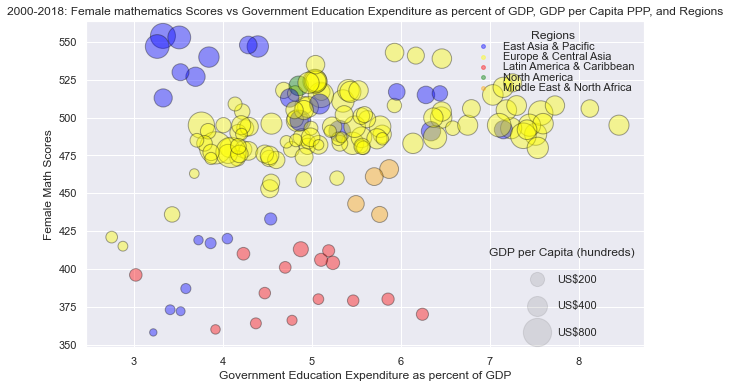

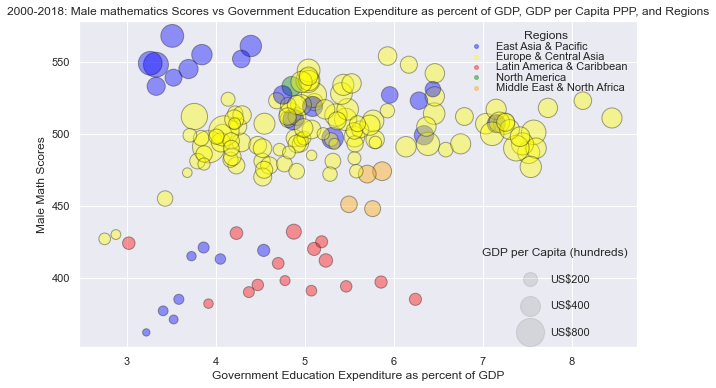

In [275]:
# Bubble plot of average math score vs Government Education Expenditure as percent of GDP, region and GDP per Capita
bubble_plots(x=pisa.gov_educ_exp_percent_gdp,y=pisa.math_score_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Mathematics Scores vs Government Education Expenditure as percent of GDP, GDP per Capita PPP, and Regions',\
             xlabel='Government Education Expenditure as percent of GDP',ylabel='Math Scores')

# Bubble plot of average female reading score vs Government Education Expenditure as percent of GDP, region and GDP per Capita
bubble_plots(x=pisa.gov_educ_exp_percent_gdp,y=pisa.math_score_female_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Female mathematics Scores vs Government Education Expenditure as percent of GDP, GDP per Capita PPP, and Regions',\
             xlabel='Government Education Expenditure as percent of GDP',ylabel='Female Math Scores')

# Bubble plot of average male reading score vs Government Education Expenditure as percent of GDP, region and GDP per Capita
bubble_plots(x=pisa.gov_educ_exp_percent_gdp,y=pisa.math_score_male_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Male mathematics Scores vs Government Education Expenditure as percent of GDP, GDP per Capita PPP, and Regions',\
             xlabel='Government Education Expenditure as percent of GDP',ylabel='Male Math Scores')

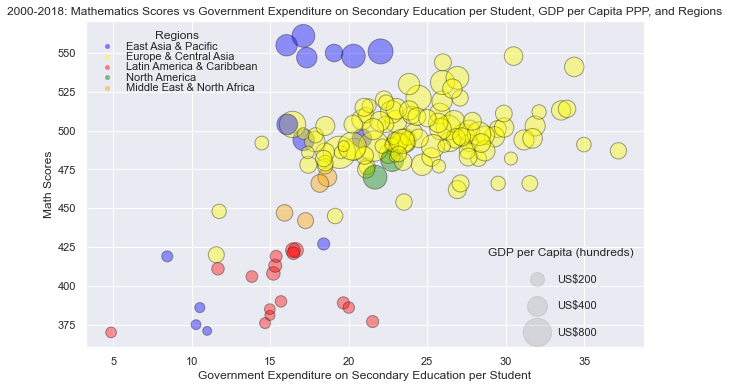

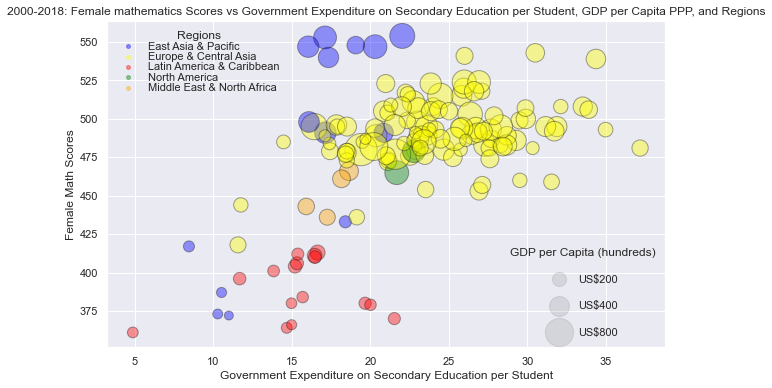

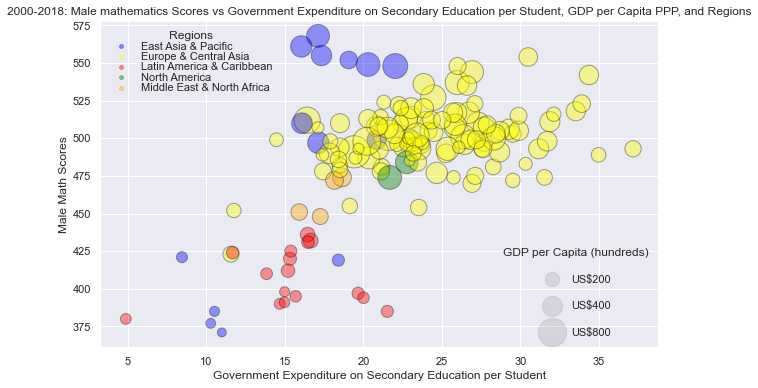

In [276]:
# Bubble plot of average math score vs Government Expenditure on Secondary Education per Student, region and GDP per Capita
bubble_plots(x=pisa.gov_exp_secondary_educ_per_student,y=pisa.math_score_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Mathematics Scores vs Government Expenditure on Secondary Education per Student, GDP per Capita PPP, and Regions',\
             xlabel='Government Expenditure on Secondary Education per Student',ylabel='Math Scores',\
             first_loc='upper left')

# Bubble plot of average female reading score vs Government Expenditure on Secondary Education per Student, region and GDP per Capita
bubble_plots(x=pisa.gov_exp_secondary_educ_per_student,y=pisa.math_score_female_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Female mathematics Scores vs Government Expenditure on Secondary Education per Student, GDP per Capita PPP, and Regions',\
             xlabel='Government Expenditure on Secondary Education per Student',ylabel='Female Math Scores',\
             first_loc='upper left')

# Bubble plot of average male reading score vs Government Expenditure on Secondary Education per Student, region and GDP per Capita
bubble_plots(x=pisa.gov_exp_secondary_educ_per_student,y=pisa.math_score_male_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Male mathematics Scores vs Government Expenditure on Secondary Education per Student, GDP per Capita PPP, and Regions',\
             xlabel='Government Expenditure on Secondary Education per Student',ylabel='Male Math Scores',\
             first_loc='upper left')

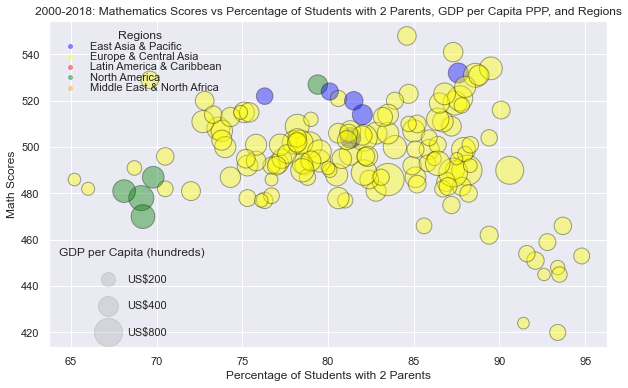

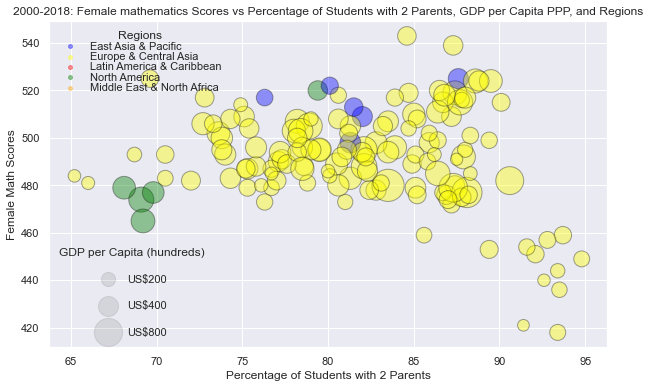

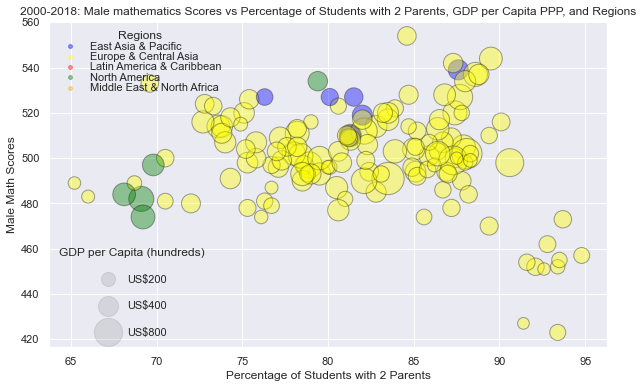

In [277]:
# Bubble plot of average math score vs Percentage of Students with 2 Parents, region and GDP per Capita
bubble_plots(x=pisa.per_2_parents,y=pisa.math_score_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Mathematics Scores vs Percentage of Students with 2 Parents, GDP per Capita PPP, and Regions',\
             xlabel='Percentage of Students with 2 Parents',ylabel='Math Scores',\
             first_loc='upper left', sec_loc='lower left')

# Bubble plot of average female math score vs Percentage of Students with 2 Parents, region and GDP per Capita
bubble_plots(x=pisa.per_2_parents,y=pisa.math_score_female_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Female mathematics Scores vs Percentage of Students with 2 Parents, GDP per Capita PPP, and Regions',\
             xlabel='Percentage of Students with 2 Parents',ylabel='Female Math Scores',\
             first_loc='upper left', sec_loc='lower left')

# Bubble plot of average male math score vs Percentage of Students with 2 Parents, region and GDP per Capita
bubble_plots(x=pisa.per_2_parents,y=pisa.math_score_male_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Male mathematics Scores vs Percentage of Students with 2 Parents, GDP per Capita PPP, and Regions',\
             xlabel='Percentage of Students with 2 Parents',ylabel='Male Math Scores',\
             first_loc='upper left', sec_loc='lower left')

**SCIENCE SCORES GRAPHICAL ANALYSIS BELOW**

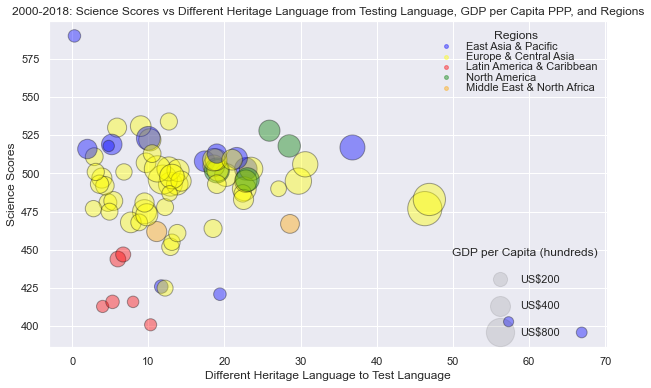

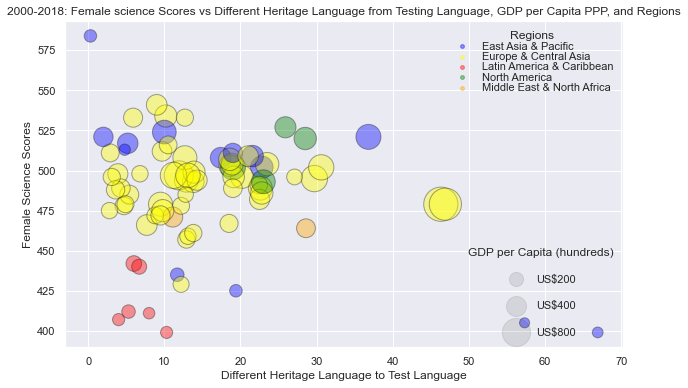

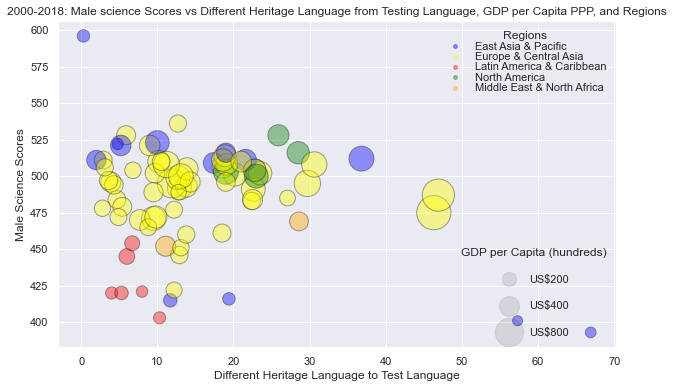

In [278]:
# Bubble plot of average science score vs Heritage Language, region and GDP per Capita
bubble_plots(x=pisa.per_diff_heritage_lang,y=pisa.science_score_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Science Scores vs Different Heritage Language from Testing Language, GDP per Capita PPP, and Regions',\
             xlabel='Different Heritage Language to Test Language',ylabel='Science Scores')

# Bubble plot of average female science score vs Heritage Language, region and GDP per Capita
bubble_plots(x=pisa.per_diff_heritage_lang,y=pisa.science_score_female_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Female science Scores vs Different Heritage Language from Testing Language, GDP per Capita PPP, and Regions',\
             xlabel='Different Heritage Language to Test Language',ylabel='Female Science Scores')

# Bubble plot of average male science score vs Heritage Language, region and GDP per Capita
bubble_plots(x=pisa.per_diff_heritage_lang,y=pisa.science_score_male_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Male science Scores vs Different Heritage Language from Testing Language, GDP per Capita PPP, and Regions',\
             xlabel='Different Heritage Language to Test Language',ylabel='Male Science Scores')

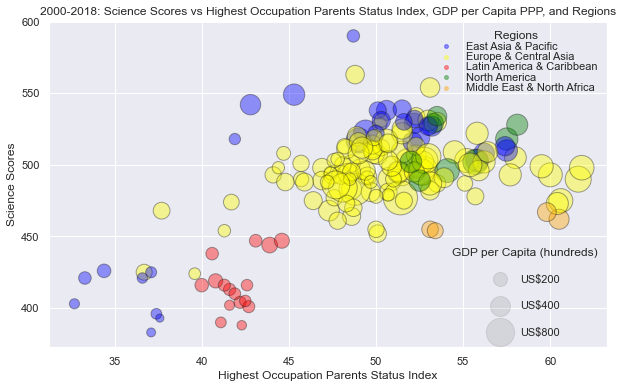

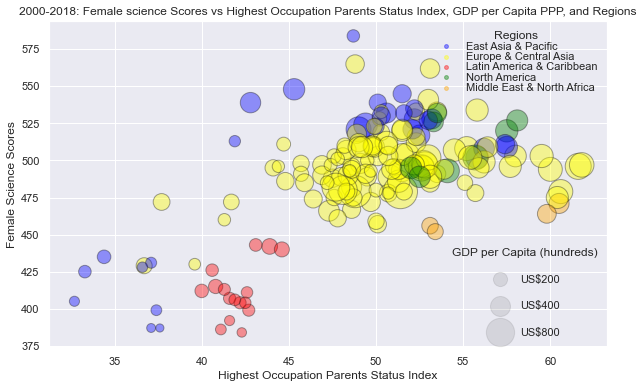

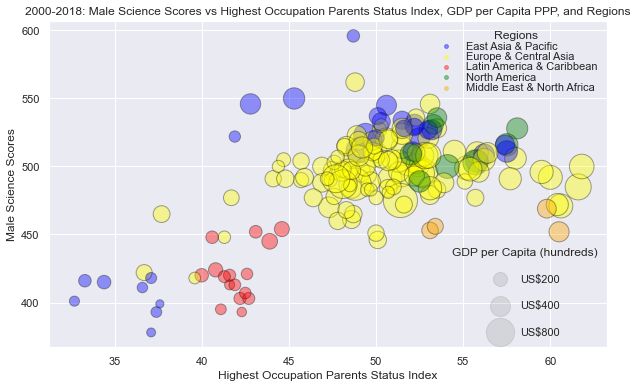

In [279]:
# Bubble plot of average science score vs Highest Occupation Parents Status Index, region and GDP per Capita
bubble_plots(x=pisa.highest_occup_parents_status_index,y=pisa.science_score_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Science Scores vs Highest Occupation Parents Status Index, GDP per Capita PPP, and Regions',\
             xlabel='Highest Occupation Parents Status Index',ylabel='Science Scores')

# Bubble plot of average female science score vs Highest Occupation Parents Status Index, region and GDP per Capita
bubble_plots(x=pisa.highest_occup_parents_status_index,y=pisa.science_score_female_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Female science Scores vs Highest Occupation Parents Status Index, GDP per Capita PPP, and Regions',\
             xlabel='Highest Occupation Parents Status Index',ylabel='Female Science Scores')

# Bubble plot of average male science score vs Highest Occupation Parents Status Index, region and GDP per Capita
bubble_plots(x=pisa.highest_occup_parents_status_index,y=pisa.science_score_male_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Male Science Scores vs Highest Occupation Parents Status Index, GDP per Capita PPP, and Regions',\
             xlabel='Highest Occupation Parents Status Index',ylabel='Male Science Scores')

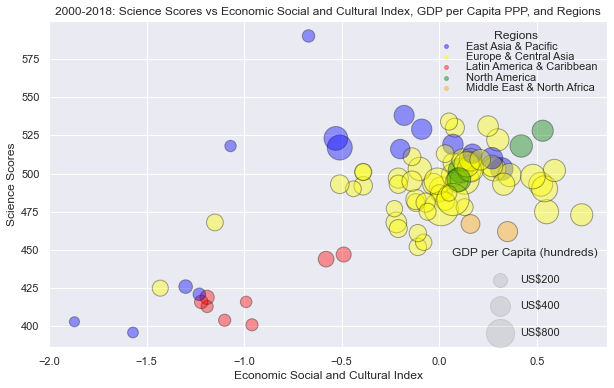

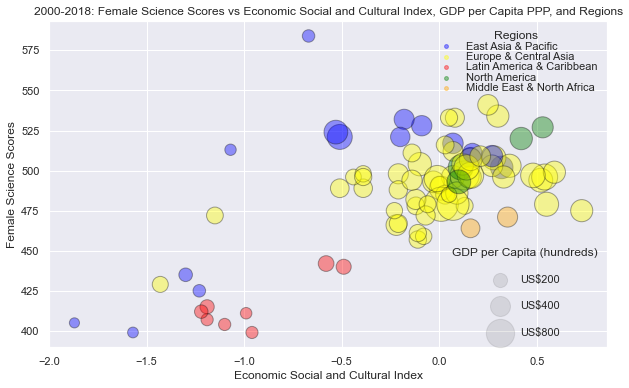

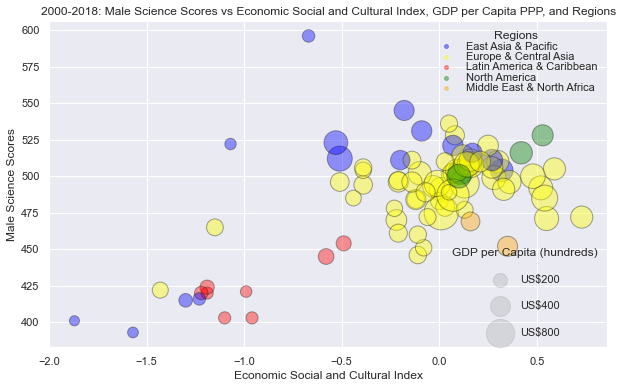

In [280]:
# Bubble plot of average science score vs Economic Social and Cultural Index, region and GDP per Capita
bubble_plots(x=pisa.econ_soc_cul_index,y=pisa.science_score_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Science Scores vs Economic Social and Cultural Index, GDP per Capita PPP, and Regions',\
             xlabel='Economic Social and Cultural Index',ylabel='Science Scores')

# Bubble plot of average female science score vs Economic Social and Cultural Index, region and GDP per Capita
bubble_plots(x=pisa.econ_soc_cul_index,y=pisa.science_score_female_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Female Science Scores vs Economic Social and Cultural Index, GDP per Capita PPP, and Regions',\
             xlabel='Economic Social and Cultural Index',ylabel='Female Science Scores')

# Bubble plot of average male science score vs Economic Social and Cultural Index, region and GDP per Capita
bubble_plots(x=pisa.econ_soc_cul_index,y=pisa.science_score_male_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Male Science Scores vs Economic Social and Cultural Index, GDP per Capita PPP, and Regions',\
             xlabel='Economic Social and Cultural Index',ylabel='Male Science Scores')

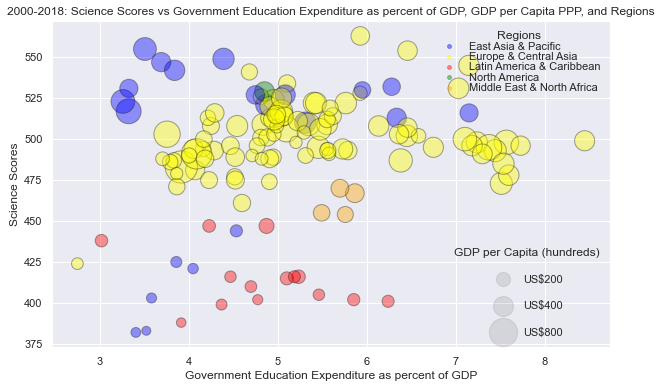

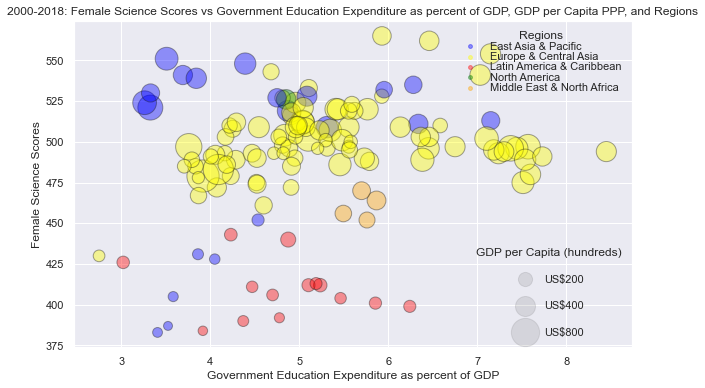

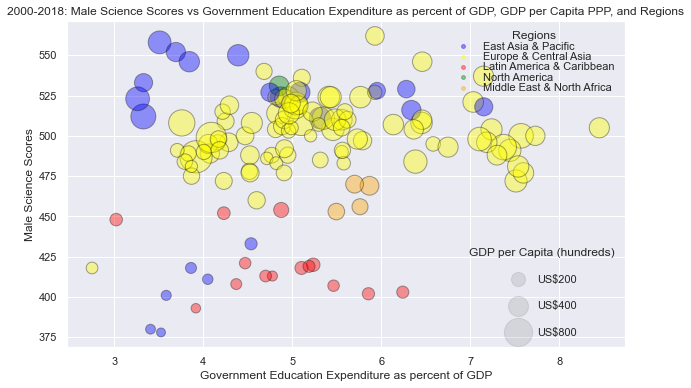

In [281]:
# Bubble plot of average science score vs Government Education Expenditure as percent of GDP, region and GDP per Capita
bubble_plots(x=pisa.gov_educ_exp_percent_gdp,y=pisa.science_score_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Science Scores vs Government Education Expenditure as percent of GDP, GDP per Capita PPP, and Regions',\
             xlabel='Government Education Expenditure as percent of GDP',ylabel='Science Scores')

# Bubble plot of average female science score vs Government Education Expenditure as percent of GDP, region and GDP per Capita
bubble_plots(x=pisa.gov_educ_exp_percent_gdp,y=pisa.science_score_female_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Female Science Scores vs Government Education Expenditure as percent of GDP, GDP per Capita PPP, and Regions',\
             xlabel='Government Education Expenditure as percent of GDP',ylabel='Female Science Scores')

# Bubble plot of average male science score vs Government Education Expenditure as percent of GDP, region and GDP per Capita
bubble_plots(x=pisa.gov_educ_exp_percent_gdp,y=pisa.science_score_male_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Male Science Scores vs Government Education Expenditure as percent of GDP, GDP per Capita PPP, and Regions',\
             xlabel='Government Education Expenditure as percent of GDP',ylabel='Male Science Scores')

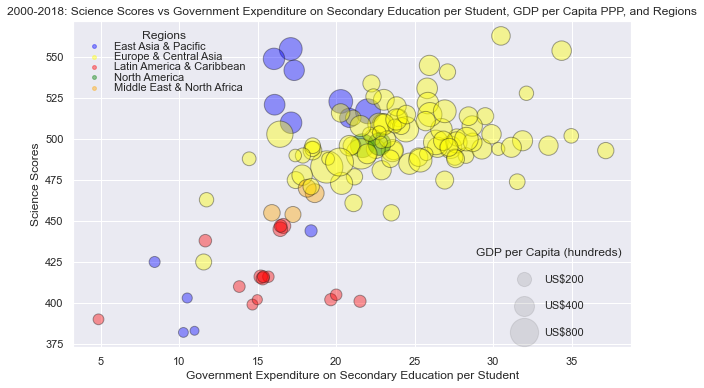

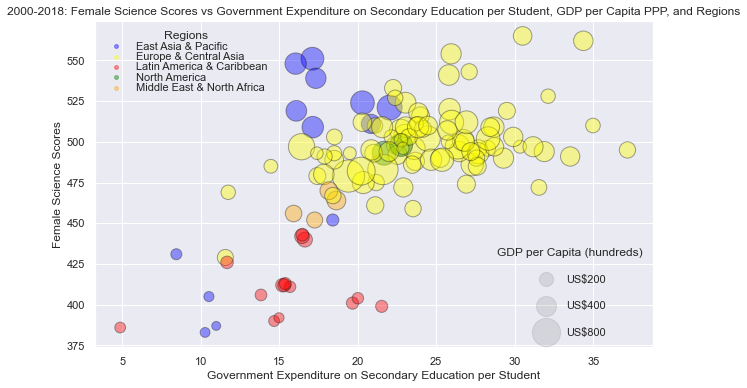

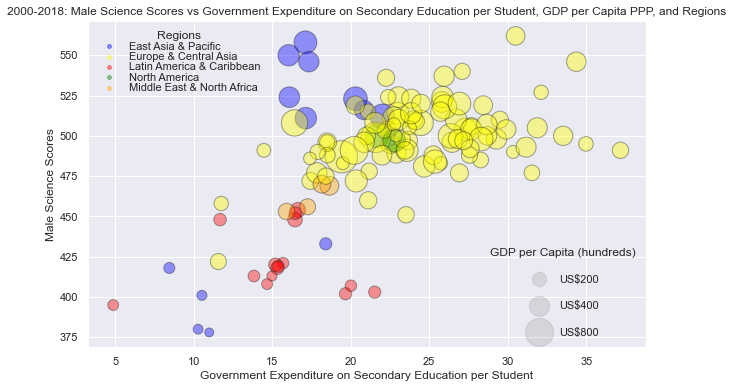

In [282]:
# Bubble plot of average science score vs Government Expenditure on Secondary Education per Student, region and GDP per Capita
bubble_plots(x=pisa.gov_exp_secondary_educ_per_student,y=pisa.science_score_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Science Scores vs Government Expenditure on Secondary Education per Student, GDP per Capita PPP, and Regions',\
             xlabel='Government Expenditure on Secondary Education per Student',ylabel='Science Scores',\
             first_loc='upper left')

# Bubble plot of average female science score vs Government Expenditure on Secondary Education per Student, region and GDP per Capita
bubble_plots(x=pisa.gov_exp_secondary_educ_per_student,y=pisa.science_score_female_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Female Science Scores vs Government Expenditure on Secondary Education per Student, GDP per Capita PPP, and Regions',\
             xlabel='Government Expenditure on Secondary Education per Student',ylabel='Female Science Scores',\
             first_loc='upper left')

# Bubble plot of average male science score vs Government Expenditure on Secondary Education per Student, region and GDP per Capita
bubble_plots(x=pisa.gov_exp_secondary_educ_per_student,y=pisa.science_score_male_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Male Science Scores vs Government Expenditure on Secondary Education per Student, GDP per Capita PPP, and Regions',\
             xlabel='Government Expenditure on Secondary Education per Student',ylabel='Male Science Scores',\
             first_loc='upper left')

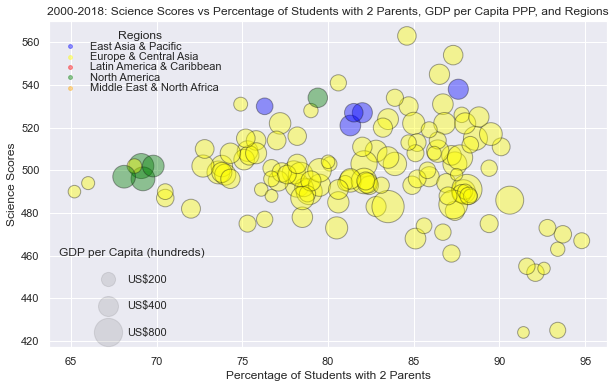

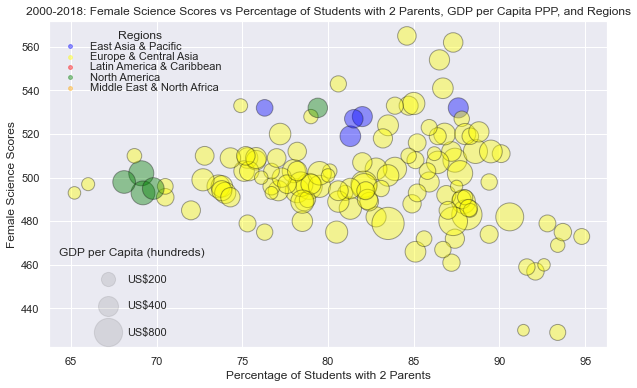

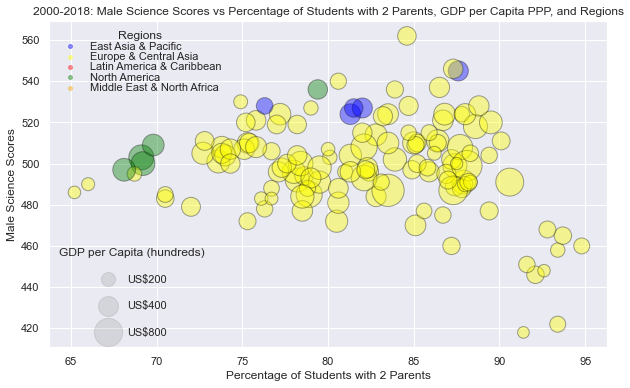

In [283]:
# Bubble plot of average science score vs Percentage of Students with 2 Parents, region and GDP per Capita
bubble_plots(x=pisa.per_2_parents,y=pisa.science_score_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Science Scores vs Percentage of Students with 2 Parents, GDP per Capita PPP, and Regions',\
             xlabel='Percentage of Students with 2 Parents',ylabel='Science Scores',\
             first_loc='upper left', sec_loc='lower left')

# Bubble plot of average female science score vs Percentage of Students with 2 Parents, region and GDP per Capita
bubble_plots(x=pisa.per_2_parents,y=pisa.science_score_female_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Female Science Scores vs Percentage of Students with 2 Parents, GDP per Capita PPP, and Regions',\
             xlabel='Percentage of Students with 2 Parents',ylabel='Female Science Scores',\
             first_loc='upper left', sec_loc='lower left')

# Bubble plot of average male science score vs Percentage of Students with 2 Parents, region and GDP per Capita
bubble_plots(x=pisa.per_2_parents,y=pisa.science_score_male_avg,\
             s=pisa.gdp_per_cap_ppp/100,\
             title='2000-2018: Male Science Scores vs Percentage of Students with 2 Parents, GDP per Capita PPP, and Regions',\
             xlabel='Percentage of Students with 2 Parents',ylabel='Male Science Scores',\
             first_loc='upper left', sec_loc='lower left')

**MAXIMUM AND MINIMUM SCORES BY SUBJECT BELOW**

In [284]:
# Country and year with min reading scores
pisa[pisa['reading_score_avg']==\
  pisa.reading_score_avg.min()][['jurisdiction','year','reading_score_avg']]

jurisdiction  year  reading_score_avg
21     Indonesia  2018              371.0
297    Indonesia  2000              371.0

In [285]:
# Country and year with the highest reading score
pisa[pisa['reading_score_avg']==\
  pisa.reading_score_avg.max()][['jurisdiction','year','reading_score_avg']]

jurisdiction  year  reading_score_avg
210        Korea  2006              556.0

In [286]:
# Country and year with min math scores
pisa[pisa['math_score_avg']==\
  pisa.math_score_avg.min()][['jurisdiction','year','math_score_avg']]

jurisdiction  year  math_score_avg
235       Brazil  2003           356.0

In [287]:
# Country and year with max math scores
pisa[pisa['math_score_avg']==\
  pisa.math_score_avg.max()][['jurisdiction','year','math_score_avg']]

jurisdiction  year  math_score_avg
7  B-S-J-Z (China)  2018           591.0

In [288]:
# Country and year with min science scores
pisa[pisa['science_score_avg']==\
  pisa.science_score_avg.min()][['jurisdiction','year','science_score_avg']]

jurisdiction  year  science_score_avg
113    Indonesia  2012              382.0

In [289]:
# Country and year with max science scores
pisa[pisa['science_score_avg']==\
  pisa.science_score_avg.max()][['jurisdiction','year','science_score_avg']]

jurisdiction  year  science_score_avg
7  B-S-J-Z (China)  2018              590.0

**Pooled Regressions and Pearson Correlations Below**

In [290]:
df_updated=pisa[['year','math_score_avg','gdp_per_cap_ppp',\
                 'highest_occup_parents_status_index']]

In [291]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308 entries, 2 to 321
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   year                                308 non-null    int64  
 1   math_score_avg                      248 non-null    float64
 2   gdp_per_cap_ppp                     296 non-null    float64
 3   highest_occup_parents_status_index  235 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 12.0 KB


In [292]:
df_updated.dropna(inplace=True)

In [293]:
df_updated.describe()

year  math_score_avg  gdp_per_cap_ppp  \
count   206.000000      206.000000       206.000000   
mean   2010.470874      485.703883     33821.126436   
std       5.525694       43.787900     16994.727049   
min    2003.000000      356.000000      5465.264202   
25%    2006.000000      476.250000     22227.513217   
50%    2009.000000      495.000000     32171.339775   
75%    2015.000000      512.000000     41686.119155   
max    2018.000000      591.000000    116786.480000   

       highest_occup_parents_status_index  
count                          206.000000  
mean                            49.069903  
std                              5.627465  
min                             32.700000  
25%                             46.900000  
50%                             49.800000  
75%                             52.475000  
max                             61.800000

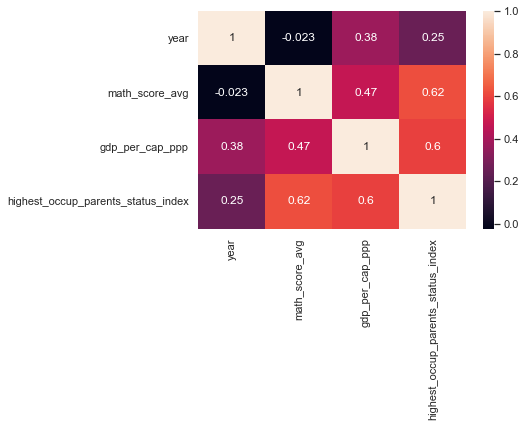

In [294]:

corrMatrix = df_updated.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()


In [295]:

# Regression Analysis

X = np.column_stack(((df_updated.gdp_per_cap_ppp/1000),\
       df_updated.highest_occup_parents_status_index))
y=df_updated.math_score_avg

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         math_score_avg   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     68.42
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           1.93e-23
Time:                        15:53:13   Log-Likelihood:                -1017.3
No. Observations:                 206   AIC:                             2041.
Df Residuals:                     203   BIC:                             2051.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        270.2112     22.894     11.803      0.000     225.071     315.352
x1             0.4039      0.174      2.322      0.021       0.061       0.747
x2             4.1131      0.525      7.830      0.000       3.077       5.149
==============================================================================
Omnibus:                        2.177   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.337   Jarque-Bera (JB):                1.970
Skew:                           0.085   Prob(JB):                        0.373
Kurtosis:                       3.448   Cond. No.                         590.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

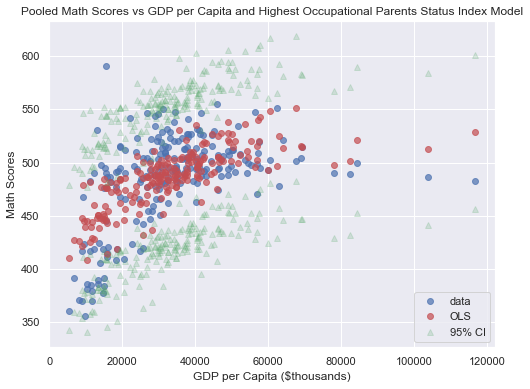

In [296]:
prstd, iv_l, iv_u = wls_prediction_std(results)
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(df_updated.gdp_per_cap_ppp, y, 'o', label="data", alpha=.7)
ax.plot(df_updated.gdp_per_cap_ppp, results.fittedvalues, 'ro', label="OLS", alpha=0.7)
ax.plot(df_updated.gdp_per_cap_ppp, iv_u, 'g^', alpha=0.2, label="95% CI")
ax.plot(df_updated.gdp_per_cap_ppp, iv_l, 'g^', alpha=0.2)
ax.set_title('Pooled Math Scores vs GDP per Capita and Highest Occupational Parents Status Index Model')
ax.set_xlabel('GDP per Capita ($thousands)')
ax.set_ylabel('Math Scores')

plt.savefig('Pooled Math scores regression results')
ax.legend(loc='best');

In [297]:
df_updated=pisa[['science_score_avg','highest_occup_parents_status_index','gdp_per_cap_ppp']]

In [298]:
df_updated.describe()

science_score_avg  highest_occup_parents_status_index  gdp_per_cap_ppp
count         212.000000                          235.000000       296.000000
mean          489.080189                           48.841702     31852.768904
std            38.626394                            5.589976     16655.959774
min           382.000000                           32.700000      4743.944694
25%           475.000000                           46.350000     19499.231887
50%           496.000000                           49.500000     30054.540680
75%           513.250000                           52.300000     40577.169563
max           590.000000                           61.800000    116786.480000

In [299]:
df_updated.dropna(inplace=True)

In [300]:
df_updated.describe()

science_score_avg  highest_occup_parents_status_index  gdp_per_cap_ppp
count         170.000000                          170.000000       170.000000
mean          488.135294                           49.375294     35598.881359
std            38.378671                            5.735695     17462.340383
min           383.000000                           32.700000      6708.575594
25%           475.000000                           47.225000     24227.230628
50%           495.000000                           50.000000     34524.894220
75%           511.750000                           52.700000     44499.252862
max           590.000000                           61.800000    116786.480000

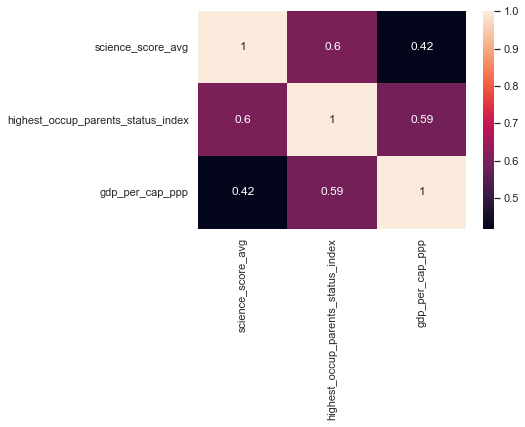

In [301]:

corrMatrix = df_updated.corr()

sns.heatmap(corrMatrix, annot=True)
plt.savefig('Heatmap of correlations between Science & predictors')
plt.show()

In [302]:


X = np.column_stack(((df_updated.gdp_per_cap_ppp/1000),\
                     df_updated.highest_occup_parents_status_index))
y=df_updated.science_score_avg

model = sm.OLS(y, sm.add_constant(df_updated.highest_occup_parents_status_index))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      science_score_avg   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     95.51
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           3.83e-18
Time:                        15:53:13   Log-Likelihood:                -822.53
No. Observations:                 170   AIC:                             1649.
Df Residuals:                     168   BIC:                             1655.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                289.2329     20.488     14.117      0.000     248.785     329.681
highest_occup_parents_status_index     4.0284      0.412      9.773      0.000       3.215       4.842
==============================================================================
Omnibus:                        1.861   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.394   Jarque-Bera (JB):                1.586
Skew:                           0.041   Prob(JB):                        0.452
Kurtosis:                       3.466   Cond. No.                         432.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

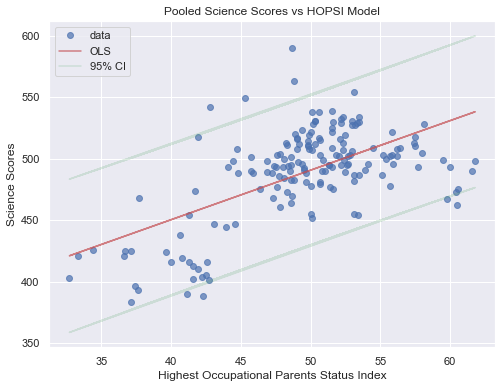

In [303]:
prstd, iv_l, iv_u = wls_prediction_std(results)
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(df_updated.highest_occup_parents_status_index, y, 'o', label="data", alpha=0.7)
ax.plot(df_updated.highest_occup_parents_status_index, results.fittedvalues, 'r-', label="OLS", alpha=0.7)
ax.plot(df_updated.highest_occup_parents_status_index, iv_u, 'g-', alpha=0.2, label="95% CI")
ax.plot(df_updated.highest_occup_parents_status_index, iv_l, 'g-', alpha=0.2)
ax.set_title('Pooled Science Scores vs HOPSI Model')
ax.set_xlabel('Highest Occupational Parents Status Index')
ax.set_ylabel('Science Scores')

plt.savefig('science regression model')
ax.legend(loc='best');

In [304]:
df_updated=pisa[['reading_score_avg','highest_occup_parents_status_index','gdp_per_cap_ppp']]

In [305]:
df_updated.describe()

reading_score_avg  highest_occup_parents_status_index  gdp_per_cap_ppp
count         281.000000                          235.000000       296.000000
mean          484.430605                           48.841702     31852.768904
std            36.472049                            5.589976     16655.959774
min           371.000000                           32.700000      4743.944694
25%           472.000000                           46.350000     19499.231887
50%           492.000000                           49.500000     30054.540680
75%           507.000000                           52.300000     40577.169563
max           556.000000                           61.800000    116786.480000

In [306]:
df_updated.dropna(inplace=True)

In [307]:
df_updated.describe()

reading_score_avg  highest_occup_parents_status_index  gdp_per_cap_ppp
count         233.000000                          233.000000       233.000000
mean          483.094421                           48.827039     32223.900996
std            36.997666                            5.608837     16890.770065
min           371.000000                           32.700000      4743.944694
25%           470.000000                           46.300000     19426.386270
50%           492.000000                           49.500000     30354.349000
75%           506.000000                           52.300000     40389.357610
max           556.000000                           61.800000    116786.480000

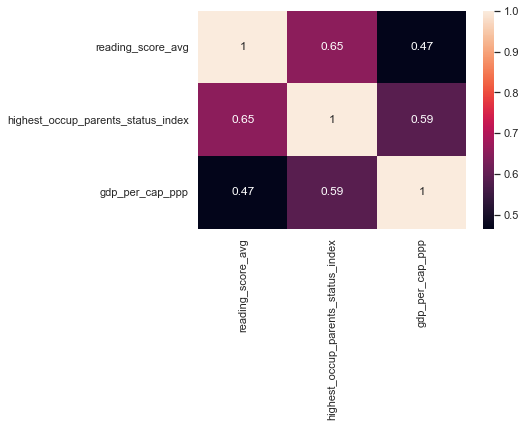

In [308]:

corrMatrix = df_updated.corr()
sns.heatmap(corrMatrix, annot=True)
plt.savefig('Heatmap of correlations between reading & predictors')
plt.show()


In [309]:

X = np.column_stack(((df_updated.gdp_per_cap_ppp/1000),\
                     df_updated.highest_occup_parents_status_index))
y=df_updated.reading_score_avg

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      reading_score_avg   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     89.39
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           1.90e-29
Time:                        15:53:14   Log-Likelihood:                -1104.4
No. Observations:                 233   AIC:                             2215.
Df Residuals:                     230   BIC:                             2225.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        287.4419     17.590     16.341      0.000     252.784     322.100
x1             0.2743      0.134      2.050      0.042       0.011       0.538
x2             3.8260      0.403      9.496      0.000       3.032       4.620
==============================================================================
Omnibus:                        1.468   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.480   Jarque-Bera (JB):                1.138
Skew:                           0.124   Prob(JB):                        0.566
Kurtosis:                       3.236   Cond. No.                         577.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

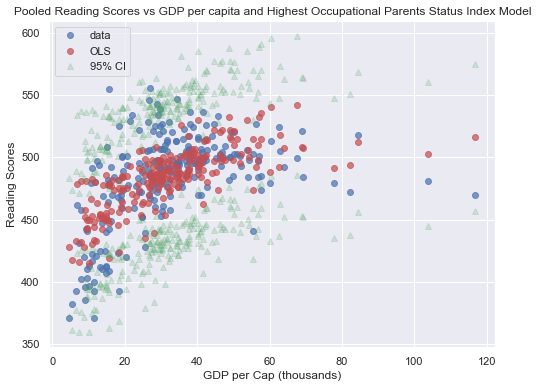

In [310]:
prstd, iv_l, iv_u = wls_prediction_std(results)
fig, ax = plt.subplots(figsize=(8,6))
gdp_cap=df_updated.gdp_per_cap_ppp/1000

ax.plot(gdp_cap, y, 'o', label="data", alpha=0.7)
ax.plot(gdp_cap, results.fittedvalues, 'ro', label="OLS", alpha=0.7)
ax.plot(gdp_cap, iv_u, 'g^', alpha=0.2, label="95% CI")
ax.plot(gdp_cap, iv_l, 'g^', alpha=0.2)
ax.set_title('Pooled Reading Scores vs GDP per capita and Highest Occupational Parents Status Index Model')
ax.set_xlabel('GDP per Cap (thousands)')
ax.set_ylabel('Reading Scores')
plt.savefig('PooledReadingRegressionResults.png')
ax.legend();

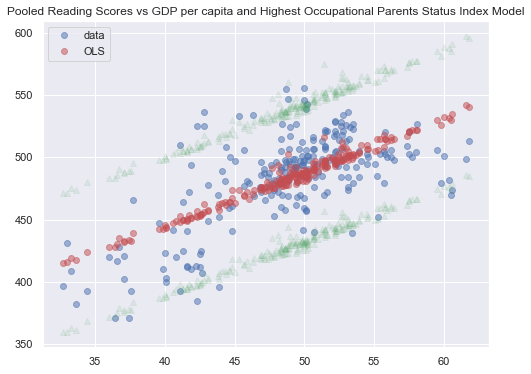

In [311]:
prstd, iv_l, iv_u = wls_prediction_std(results)
fig, ax = plt.subplots(figsize=(8,6))
HOPSI=df_updated.highest_occup_parents_status_index

ax.plot(HOPSI, y, 'o', label="data", alpha=0.5)
ax.plot(HOPSI, results.fittedvalues, 'ro', label="OLS", alpha=0.5)
ax.plot(HOPSI, iv_u, 'g^', alpha=0.1)
ax.plot(HOPSI, iv_l, 'g^', alpha=0.1)
plt.title("Pooled Reading Scores vs GDP per capita and Highest Occupational Parents Status Index Model")
ax.legend();